In [1]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import os
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

# Construct the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
# SQL query to retrieve data from the table LP1_startup_funding2020
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

# SQL query to retrieve data from the table LP1_startup_funding2021
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

# Execute the SQL queries and load the results into pandas DataFrames
data_2020 = pd.read_sql(query_2020, connection)

In [5]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [7]:
# Execute the SQL queries and load the results into pandas DataFrames
data_2021 = pd.read_sql(query_2020, connection)

In [8]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


# Data Understanding & Preparation

In [9]:
# Load data from different sources
data1 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 1.csv')
data2 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 2.csv')
data3 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 3.csv')
data4 = pd.read_csv('C:/Users/viole/OneDrive/Desktop/learner/learner-file/data/customer_churn - 4.csv')

In [10]:
#  Concatenate data into a single DataFrame

concatenated_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [11]:
concatenated_data.to_csv('learner1.csv')

In [13]:
data = pd.read_csv('learner1.csv')

In [17]:
data.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,0,Cameron Williams,42,11066.80,0,7.22,8,8/30/2013 7:00,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,1,Kevin Mueller,41,11916.22,0,6.50,11,8/13/2013 0:38,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,2,Eric Lozano,38,12884.75,0,6.67,12,6/29/2016 6:20,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,3,Phillip White,42,8010.76,0,6.71,10,4/22/2014 12:43,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,4,Cynthia Norton,37,9191.58,0,5.56,9,1/19/2016 15:31,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [18]:
data.describe()

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    int64  
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    int64  
 7   Onboard_date     900 non-null    object 
 8   Location         900 non-null    object 
 9   Company          900 non-null    object 
 10  Churn            900 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 77.5+ KB


NameError: name 'plt' is not defined

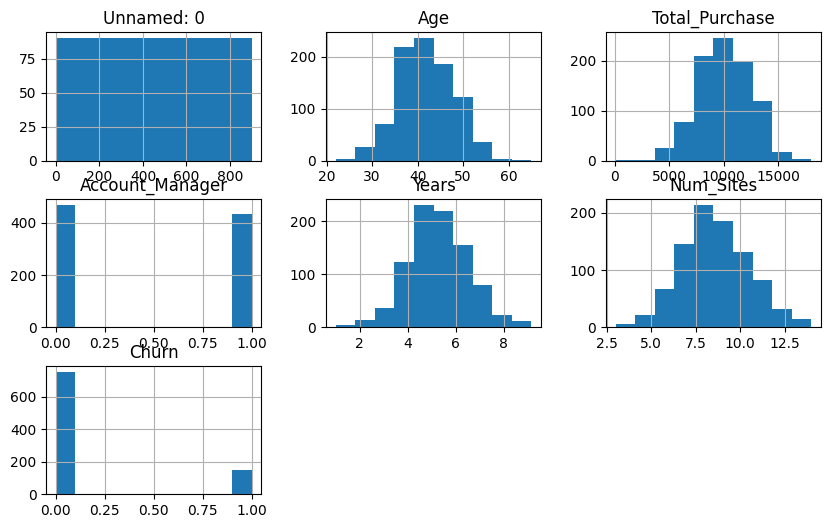

In [20]:
# Univariate analysis
# Histogram for numeric variables
data.hist(figsize=(10, 6))
plt.show()

In [21]:
# Check for missen values
data.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [22]:
# Check unique values in the 'Account_Manager' column
unique_values = data['Account_Manager'].unique()

# Display unique values
print(unique_values)

[0 1]


In [23]:
# Convert unique values of 'Account_Manager' column to object type
data['Account_Manager'] = data['Account_Manager'].astype(str)

# Check the updated data types
print(data.dtypes)

Unnamed: 0           int64
Names               object
Age                  int64
Total_Purchase     float64
Account_Manager     object
Years              float64
Num_Sites            int64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object


## 3. Formulate Hypothesis

What is a hypothesis?


Null Hypothesis (H0): Assigning an Account manager does not have any influence on total purchase

Alternative Hypothesis (H1): Assigning an Account Manager has a significant influence on total purchase

3.  Select Statistical Test and conduct the test

For now I am using the t-test.

In [25]:
# Separate data into two groups
Account_Manager_1 = data[data['Account_Manager'] == '1']
Account_Manager_0 = data[data['Account_Manager'] == '0']

In [26]:
# Perform independent t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(Account_Manager_1["Total_Purchase"], Account_Manager_0["Total_Purchase"])

In [27]:
# Display test results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.4751988640325539
p-value: 0.6347607935185864


In [28]:
# Set significance level
alpha = 0.05

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis. Account manager has a significant influence on total purchase.")
else:
    print("Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.")

Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.


<Axes: xlabel='Total_Purchase', ylabel='Count'>

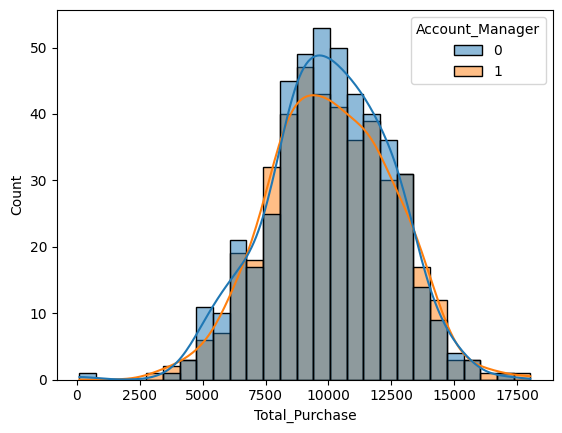

In [29]:
import seaborn as sns
# Plot histogram with seaborn
sns.histplot(data=data, x="Total_Purchase", hue="Account_Manager", kde=True)

## Findings

#### Based on the 5% significance level, there is sufficient evidence to suggest that the mean total purchase amount for clients without an account manager is higher than that for clients with an account manager.